In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#Carga de archivos
inmu = pd.read_csv("Clusters.csv")
inmu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           657 non-null    int64  
 1   Alcaldia             657 non-null    object 
 2   Colonia              657 non-null    object 
 3   X1                   657 non-null    float64
 4   X2                   657 non-null    float64
 5   X3                   657 non-null    float64
 6   X4                   657 non-null    float64
 7   X5                   657 non-null    float64
 8   X6                   657 non-null    float64
 9   X7                   657 non-null    float64
 10  X8                   657 non-null    float64
 11  X9                   657 non-null    float64
 12  X10                  657 non-null    float64
 13  Cocina_equip         657 non-null    int64  
 14  Gimnasio             657 non-null    int64  
 15  Amueblado            657 non-null    int

In [4]:
inmu.dropna(inplace=True)

In [40]:
#Tomamos todas las columnas NUMÉRICAS a excepción de la 23 (nuestro target variable) para
#determinar el comportamiento de las variables con respecto a nuestra variable
X = inmu.select_dtypes(include=['float64', 'int64']).drop(columns=['Precio_m2','Cluster Labels','Unnamed: 0'])
#x = inmu.iloc[:,1:]   # todas las columnas posteriores a la primera
y = inmu.iloc[:,23]    # la primera columna

#Entrenamos nuestro modelo con las variables seleccionadas
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3)

#regr_1 = DecisionTreeRegressor(max_depth=2)
#regr_2 = DecisionTreeRegressor(max_depth=5)
#regr_1.fit(X, y)
#regr_2.fit(X, y)

In [41]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Cocina_equip,Gimnasio,Amueblado,Alberca,Terraza,Elevador,m2_construido,Baños,Recamaras,Lugares_estac
0,1.857685,5.622805,47.821312,21.693800,32.202925,4.541026,0.705162,0.167438,9.555907,50.081349,1,1,0,0,1,1,150.0,2.0,3,2
1,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,9.610347,52.749945,1,0,0,0,0,0,51.0,1.0,2,1
2,1.550909,5.758377,44.360119,18.897734,24.415938,4.172703,0.428650,0.061151,6.675828,39.647755,1,1,0,0,1,1,305.0,3.0,3,3
3,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,9.610347,52.749945,0,0,0,0,0,0,42.0,1.0,2,1
4,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,9.610347,52.749945,0,0,0,0,0,0,50.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0.351538,6.230002,31.695907,6.071809,20.071382,0.476854,0.025017,0.019992,3.169090,15.149627,1,1,0,0,1,1,99.0,2.0,2,1
653,0.771834,4.983509,32.914771,10.974065,24.551109,1.695343,0.048384,0.030823,5.469807,25.714023,1,0,0,0,0,1,64.0,1.0,2,1
654,1.857685,5.622805,47.821312,21.693800,32.202925,4.541026,0.705162,0.167438,9.555907,50.081349,1,1,0,0,1,1,90.0,1.0,3,1
655,1.857685,5.622805,47.821312,21.693800,32.202925,4.541026,0.705162,0.167438,9.555907,50.081349,1,0,0,0,0,0,50.0,1.0,2,1


In [42]:
#Corremos nuestro modelo:

dtree = DecisionTreeRegressor(random_state=44)
dtree.fit(x_train, y_train)  #entrenamiento: covars y respuesta
pred = dtree.predict(x_test)  #predicción con covars no entrenadas.
print(pred)

[  650.          2000.           219.99        2700.
  2850.5         4570.          2560.           890.
  2093.          2350.          9990.          7150.
 14000.         13500.          1600.          8087.045
   622.45         903.9995      8150.           838.95333333
   650.          1095.45       10290.          1400.
  1980.          6200.           547.           876.831
  1320.          3323.          4300.          1157.
 17500.         34900.         15500.          3200.
  1050.          4449.         15000.          3010.
  2001.          1595.          4500.         12300.
   680.           850.          5900.          4800.
   737.354        650.          1290.          3381.
  4800.          3465.          2328.441        650.
  1070.           790.           522.431      28000.
   613.06        2400.          5450.          2300.
  1250.          8900.           499.13333333 17666.
  1157.          6900.          1796.66666667  1024.368
   980.         34900.       

In [76]:
from sklearn.metrics import mean_squared_error
#Evaluamos nuestro modelo
print("Mean Squared Error:", mean_squared_error(y_test, pred))
print("R-squared:", r2_score(y_test, pred))

Mean Squared Error: 7736572.374675505
R-squared: 0.7472495789058873


Hay un margen de error increíblemente alto, dado que con tan solo 650 datos existe un error de 1417. Sin embargo, nuestro valor de R-squared quedó relativamente bien (el 75% de nuestros datos puede ser explicado por nuestro modelo).
Debido a esto, continuaremos con realizar un análisis para determinar la importancia de cada una de las variables elegidas y así su relevancia hacia nuestro modelo, para intentar corregir este error.

In [44]:
feature_importance = dtree.feature_importances_
feature_names = X.columns

# Para una mejor visualización, crearemos un data frame nuevo con los nombres de las variables
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Lo ordenamos en orden descendiente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostramos los resultados
print(feature_importance_df)

          Feature  Importance
16  m2_construido    0.773168
8              X9    0.071493
4              X5    0.050615
17          Baños    0.036582
1              X2    0.015738
19  Lugares_estac    0.014248
18      Recamaras    0.011646
2              X3    0.004727
13        Alberca    0.004667
9             X10    0.003562
6              X7    0.003536
11       Gimnasio    0.003256
0              X1    0.002430
7              X8    0.001807
14        Terraza    0.001031
15       Elevador    0.000883
10   Cocina_equip    0.000324
12      Amueblado    0.000185
3              X4    0.000086
5              X6    0.000014


Podemos observar que las variables con mayor relevancia a nuestro análisis son los m2 construidos, así como las viviendas que no disponen de celular (X9) y la población sin derechohabiencia a servicios de salud (X5). Sin embargo, estas últimas dos no parecen tener la relevancia tan directa como la que tiene los metros cuadrados construidos con nuestra variable de precio. Las tomaremos de igual manera para la realización de este análisis.

In [48]:
#Tomamos las columnas con mayor importancia en relación a nuestra target variable
variables_seleccionadas = ['m2_construido', 'X9', 'X5']
X2 = inmu[variables_seleccionadas]
y = inmu.iloc[:,23]    # nuestra variable dependiente

#Entrenamos nuestro modelo con las variables seleccionadas
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y, test_size=.3)

#regr_1 = DecisionTreeRegressor(max_depth=2)
#regr_2 = DecisionTreeRegressor(max_depth=5)
#regr_1.fit(X, y)
#regr_2.fit(X, y)

In [49]:
#Corroboramos que nuestras variables estén guardadas exitosamente
X2

,m2_construido,X9,X5
0,150.0,9.555907,32.202925
1,51.0,9.610347,26.778072
2,305.0,6.675828,24.415938
3,42.0,9.610347,26.778072
4,50.0,9.610347,26.778072
...,...,...,...
652,99.0,3.169090,20.071382
653,64.0,5.469807,24.551109
654,90.0,9.555907,32.202925
655,50.0,9.555907,32.202925


In [56]:
#Corremos nuestro modelo:
dtree2 = DecisionTreeRegressor(random_state=44)
dtree2.fit(x2_train, y2_train)  #entrenamiento: covars y respuesta
pred2 = dtree2.predict(x2_test)  #predicción con covars no entrenadas.
print(pred2)

[ 3295.          8524.          2365.74       19250.
  9100.           665.          2400.           295.
   771.          1411.42875    11900.          2250.
   712.18        2012.           622.45       12500.
   639.29525    12738.           820.92        3350.
  2900.          1250.          2874.          1102.87414286
   665.           794.64666667   633.23475      746.419
  1915.          6090.5         3900.         11000.
   804.          1600.           674.829       2250.
  3276.83        3350.          1820.2215       974.52
   639.29525     1180.           561.4          633.23475
  4045.435      10800.           614.076        622.45
   674.829        974.52        1450.           763.86933333
  2048.5         4108.803       4045.435       5950.
  3350.          3850.           639.29525     3270.
  1411.42875      794.64666667  2900.          1102.87414286
   600.98466667  1600.          3062.          4250.
  3062.           746.419       2048.5         2350.
  3990.   

In [77]:
from sklearn.metrics import mean_squared_error
#Evaluamos nuestro modelo
print("Mean Squared Error:", mean_squared_error(y2_test, pred2))
print("R-squared:", r2_score(y2_test, pred2))

Mean Squared Error: 2654404.910780402
R-squared: 0.8358675944848176


El R-Squared aumentó a la vez que el error disminuyó. El modelo mejoró, pero no podemos confirmar si es del todo confiable considerando que el error sigue siendo muy alto para la cantidad de datos que tenemos. Por ende, realizaremos una poda de árbol, pero primero veremos cómo este se comporta gráficamente.

In [70]:
#Podemos insertar datos en el modelo para predecir su comportamiento:
dtree2.predict([[450,7.8,32.76]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([28000.])

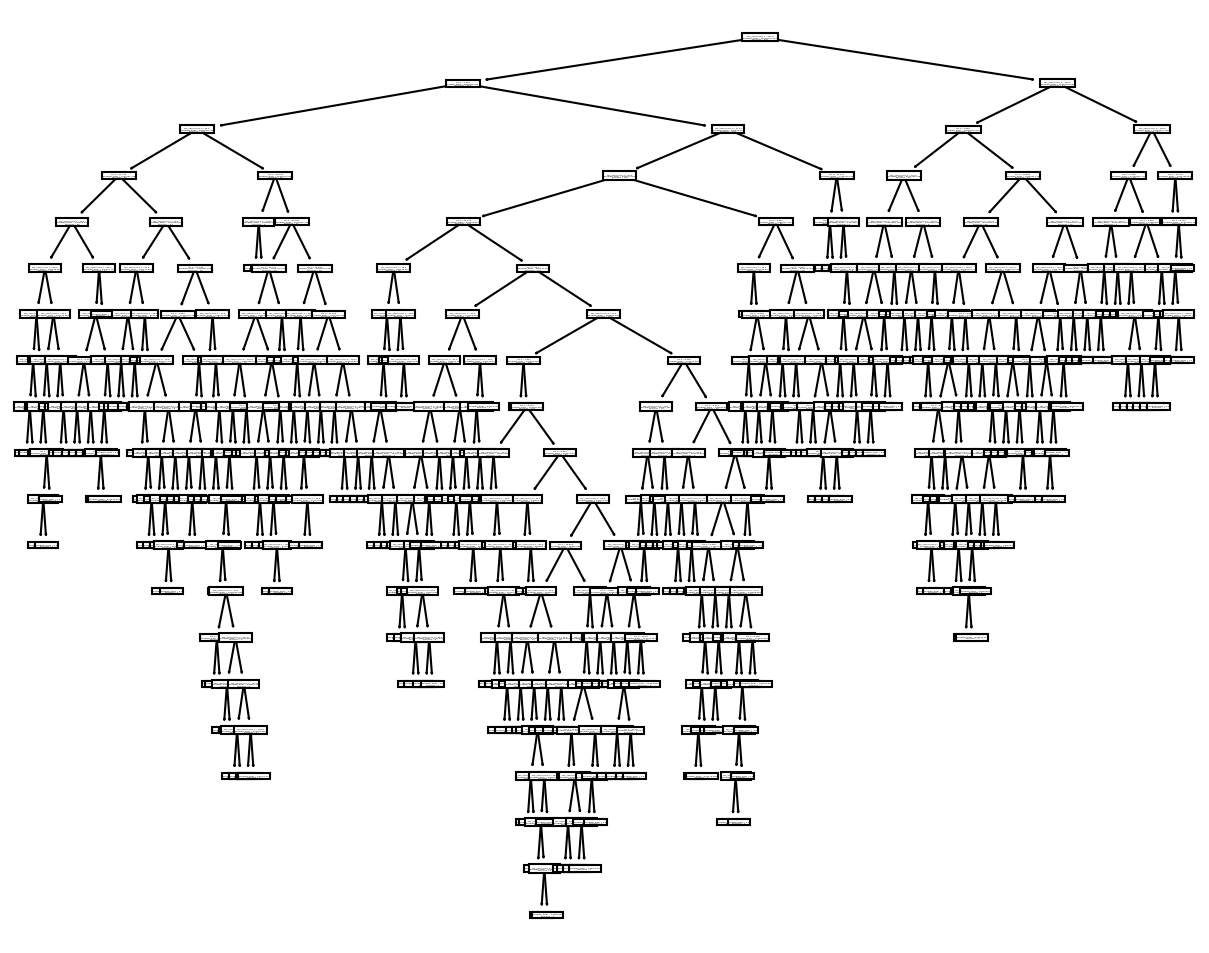

In [71]:
#Podemos imprimir el árbol de decisión:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(dtree2, feature_names=X2.columns);

Existen muchas variables a nuestro decision tree así como un sobreajuste, por lo que será necesaria una poda de árbol.

In [153]:
# Realizamos la poda ajustando los hiperparámetros
dtree_poda = DecisionTreeRegressor(max_depth=6, min_samples_split=9, min_samples_leaf=3, ccp_alpha=0.01,random_state=42)
dtree_poda.fit(x2_train, y2_train)

DecisionTreeRegressor(ccp_alpha=0.01, max_depth=6, min_samples_leaf=3,
                      min_samples_split=9, random_state=42)

In [154]:
# Realizamos predicciones en el conjunto de prueba después de la poda
y_pred_poda = dtree_poda.predict(x2_test)

In [155]:
# Calculamos el error cuadrático medio (MSE) después de la poda
mse_poda = mean_squared_error(y2_test, y_pred_poda)
print(f'MSE después de la poda: {mse_poda}')
print("R-squared:", r2_score(y2_test, pred2))

MSE después de la poda: 2181058.561643255
R-squared: 0.8358675944848176


A través de distintas pruebas y ajustes en los hiperparámetros, estos son aquellos en donde el MSE es de menor cantidad. A pesar de que disminuyó luego de la poda, sigue siendo un valor extremadamente alto, por lo que probaremos con distintas estrategias para su evaluación.

No obstante, ya podemos observar una diferencia significativa en nuestra gráfica.

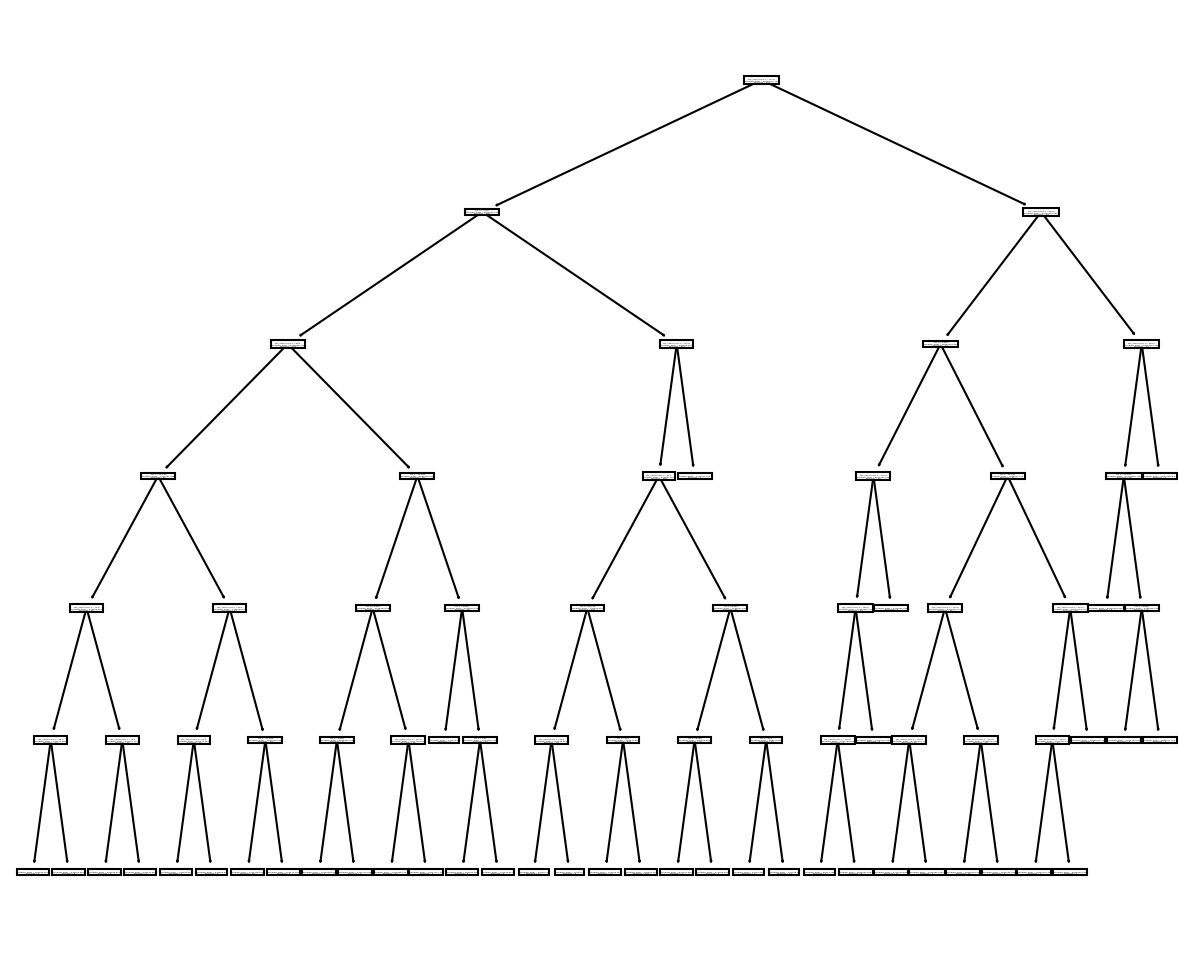

In [156]:
#Podemos imprimir el árbol de decisión:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(dtree_poda, feature_names=X2.columns);

In [157]:
#Validación Cruzada para evaluar el rendimiento de nuestro modelo
from sklearn.model_selection import cross_val_score

# Realizamos la validación cruzada con 5 divisiones (k=5)
cross_val_scores = cross_val_score(dtree2, X2, y, cv=5, scoring='r2')

# Imprimimos los puntajes R-squared en cada pliegue
print("R-squared en cada pliegue:", cross_val_scores)

# Imprimimos el R-squared promedio
print("R-squared promedio:", cross_val_scores.mean())

R-squared en cada pliegue: [0.73309841 0.85260213 0.02437481 0.57751551 0.75084187]
R-squared promedio: 0.5876865471568692


Podemos observar que, en promedio, nuestro rendimiento es en realidad del 58.77% (no del 83.59 como habíamos determinado antes). La validación cruzada implica dividir el conjunto de datos en pliegues (folds) y entrenar/evaluar el modelo en cada uno de ellos. La variabilidad en los pliegues puede resultar en diferentes valores de R-squared en cada iteración, lo cual es especialmente cierto si el conjunto de datos es relativamente pequeño, por lo que es normal si estos dos datos (el R-squared promedio y el general) son distintos.

Por otro lado, como habíamos observado con anterioridad, nuestro modelo estaba sobreajustado, por lo que el R-squared podría haber sido efecto del mismo y no esté representando adecuadamente la variabilidad. Debido a que ya se realizaron todos los ajustes correspondientes (ajuste de hiperparámetros, distintas estrategias de poda, validación cruzada), podemos concluir que nuestro R-squared final es de 0.59, lo cual signfica que nuestro modelo puede explicar el 59% de los datos con éxito.

Lo anterior, a pesar de ser un dato significativo, si tomamos en cuenta nuestro error cuadrático medio (MSE = 2,181,058.56), no recomendaríamos este modelo para la predicción de los datos, ya que no es del todo confiable.

